In [38]:
#Read from CSV file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Spelunky2.csv', sep = ',', encoding = 'latin-1')
del df['URL']

print(df)


       Run ID   User ID        User Name            Category  Hours  Minutes  \
0    yj6kwvgz  zxzq79xq         krille71                Any%      0      6.0   
1    zxdvp95y  68w7oolx      Buddy7heElf                Any%      0      7.0   
2    y8rqll5m  pj0ep4m8            d_tea                Any%      0      3.0   
3    yj6kv87z  7j476w5j            InTol                Any%      0      5.0   
4    z09ev0jz  qj26rvox          grooomp                Any%      0     16.0   
..        ...       ...              ...                 ...    ...      ...   
598  y6row86y  qxkge2mj  GruntingCrunchy        Sunken City%      0     16.0   
599  zgv20rnz  86voyq5j  DonSebaTrifulca  No Teleporter Any%      0      6.0   
600  ylvnwxrm  j92e5zv8     SuperSaltlee                Any%      0      4.0   
601  y8r044dm  48godvrx          Mazerak             No Gold      0      3.0   
602  yv98kkoz  48godvrx          Mazerak  No Teleporter Any%      0      3.0   

     Seconds Platform ID  Platform Name

In [39]:
#Clean data

df = df.loc[(df['Category'] == 'Any%') & (df['Verified'] == 'verified') & (df['Date'].notnull())]
df = df.rename({'User Name': 'userName'}, axis=1)
df = df.sort_values(["Date"])
del df['Verified']
del df['Run ID']
del df['User ID']

totalSeconds = []

for x in range(len(df)):
    seconds = 0.0
    seconds += (df.iloc[x].Hours * 3600) + (df.iloc[x].Minutes * 60) + (df.iloc[x].Seconds)
    totalSeconds.append(seconds)

df['TimeSeconds'] = totalSeconds
df = df[['userName', 'Category', 'Hours', 'Minutes', 'Seconds', 'TimeSeconds', 'Platform Name', 'Date']]

print(df)

            userName Category  Hours  Minutes  Seconds  TimeSeconds  \
0           krille71     Any%      0      6.0    8.616      368.616   
1        Buddy7heElf     Any%      0      7.0   42.116      462.116   
2              d_tea     Any%      0      3.0   36.200      216.200   
3              InTol     Any%      0      5.0   38.233      338.233   
4            grooomp     Any%      0     16.0   17.400      977.400   
..               ...      ...    ...      ...      ...          ...   
580     PastryPerson     Any%      0      2.0   51.466      171.466   
582          Mikulus     Any%      0      8.0    9.850      489.850   
590           HOBT0R     Any%      0      5.0   23.966      323.966   
594          twiggle     Any%      0      2.0   30.133      150.133   
596  GruntingCrunchy     Any%      0      4.0   31.450      271.450   

     Platform Name        Date  
0    Playstation 4  2020-09-15  
1    Playstation 4  2020-09-17  
2    Playstation 4  2020-09-17  
3    Playstatio

        userName Category  Hours  Minutes  Seconds  TimeSeconds  \
0       krille71     Any%      0      6.0    8.616      368.616   
2          d_tea     Any%      0      3.0   36.200      216.200   
18         InTol     Any%      0      3.0    1.700      181.700   
50         d_tea     Any%      0      2.0   53.766      173.766   
147     Kinnijup     Any%      0      2.0   43.933      163.933   
227  Buddy7heElf     Any%      0      2.0   43.650      163.650   
304      grooomp     Any%      0      2.0   41.100      161.100   
319      twiggle     Any%      0      2.0   36.183      156.183   
308        d_tea     Any%      0      2.0   28.216      148.216   
552     Kinnijup     Any%      0      2.0    6.183      126.183   

     Platform Name        Date  
0    Playstation 4  2020-09-15  
2    Playstation 4  2020-09-17  
18   Playstation 4  2020-09-24  
50   Playstation 4  2020-09-28  
147  Playstation 4  2020-10-07  
227  Playstation 4  2020-10-15  
304             PC  2020-10-20 

Text(0.5, 1.0, 'Spelunky 2 (Any%) World Record Progression')

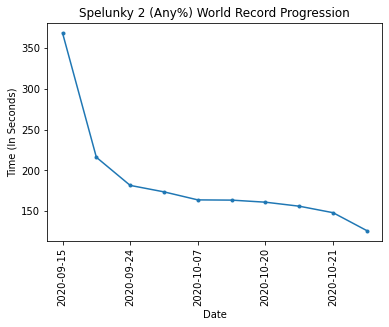

In [40]:
#Find World Record Progression

worldRecords = []
minTime = df.iloc[0].TimeSeconds

for x in range(len(df)):
    if df.iloc[x].TimeSeconds <= minTime:
        worldRecords.append(df.iloc[x])
        minTime = df.iloc[x].TimeSeconds

wrdf = pd.DataFrame(worldRecords)
print(wrdf)

wrdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spelunky 2 (Any%) World Record Progression")

In [41]:
#Print Leadboard

rankingsFirst = df.sort_values(["Hours", "Minutes", "Seconds"])
rankingsFirst = rankingsFirst.drop_duplicates(subset = "userName")

print("Fastest Times: ")
print (rankingsFirst)

rankingsLast = df.sort_values(["Date"])
rankingsLast = rankingsLast.drop_duplicates(subset = "userName")
print("First Entires: ")
print(rankingsLast)

#TODO: Make array of tuples with (userName, timesecondsFastest, timesecondsFirst)

Fastest Times: 
         userName Category  Hours  Minutes  Seconds  TimeSeconds  \
552      Kinnijup     Any%      0      2.0    6.183      126.183   
559      krille71     Any%      0      2.0   22.933      142.933   
308         d_tea     Any%      0      2.0   28.216      148.216   
594       twiggle     Any%      0      2.0   30.133      150.133   
500          Spef     Any%      0      2.0   34.400      154.400   
..            ...      ...    ...      ...      ...          ...   
128        Myelin     Any%      0      9.0   11.483      551.483   
537    quartzonio     Any%      0      9.0   18.050      558.050   
132    meowmixmix     Any%      0      9.0   51.416      591.416   
329        ABob71     Any%      0     10.0   16.616      616.616   
117  mynameisAndy     Any%      0     30.0   46.660     1846.660   

     Platform Name        Date  
552             PC  2020-11-17  
559             PC  2020-11-18  
308  Playstation 4  2020-10-21  
594             PC  2020-11-23  
50

     userName Category  Hours  Minutes  Seconds  TimeSeconds  Platform Name  \
7    Kinnijup     Any%      0      8.0   15.733      495.733  Playstation 4   
147  Kinnijup     Any%      0      2.0   43.933      163.933  Playstation 4   
552  Kinnijup     Any%      0      2.0    6.183      126.183             PC   

           Date  
7    2020-09-20  
147  2020-10-07  
552  2020-11-17  
     userName Category  Hours  Minutes  Seconds  TimeSeconds  Platform Name  \
0    krille71     Any%      0      6.0    8.616      368.616  Playstation 4   
14   krille71     Any%      0      3.0   54.633      234.633  Playstation 4   
42   krille71     Any%      0      3.0   38.183      218.183  Playstation 4   
43   krille71     Any%      0      3.0   38.183      218.183  Playstation 4   
44   krille71     Any%      0      3.0   38.183      218.183  Playstation 4   
45   krille71     Any%      0      3.0   38.183      218.183  Playstation 4   
228  krille71     Any%      0      3.0   14.600      194.6

Text(0.5, 1.0, 'Spelunky 2 (Any%) Spef Progression')

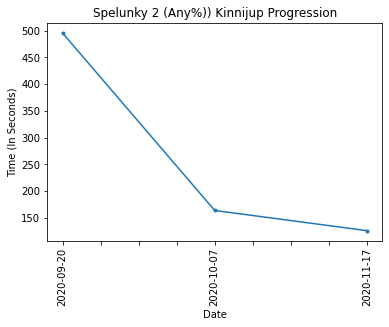

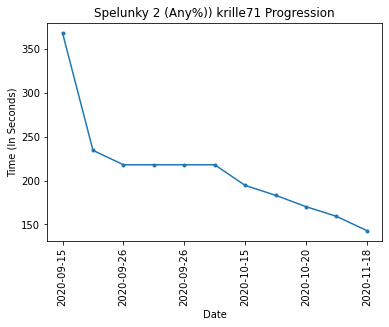

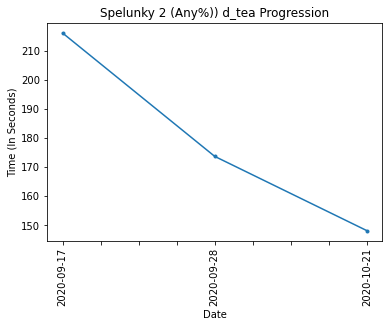

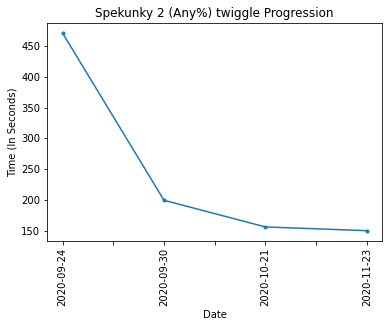

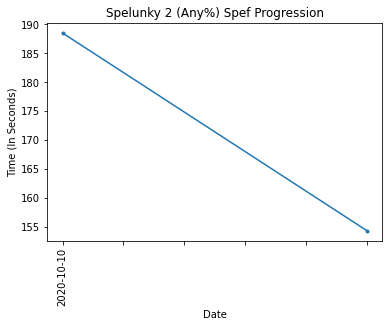

In [42]:
#Graph 5 Fastest Players

wrhdf = df.loc[df['userName'] == 'Kinnijup']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spelunky 2 (Any%)) Kinnijup Progression")

wrhdf = df.loc[df['userName'] == 'krille71']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spelunky 2 (Any%)) krille71 Progression")

wrhdf = df.loc[df['userName'] == 'd_tea']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spelunky 2 (Any%)) d_tea Progression")

wrhdf = df.loc[df['userName'] == 'twiggle']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spekunky 2 (Any%) twiggle Progression")

wrhdf = df.loc[df['userName'] == 'Spef']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spelunky 2 (Any%) Spef Progression")

Text(0.5, 1.0, 'Spelunky 2 Platform Distribution')

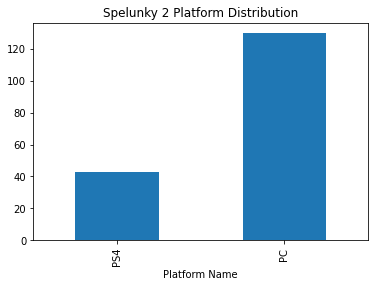

In [51]:
#xboxCount = np.count_nonzero(df['Platform Name']=='XBox 360')
pcCount = np.count_nonzero(df['Platform Name']=='PC')
#ps3Count = np.count_nonzero(df['Platform Name']=='Playstation 3')
ps4Count = np.count_nonzero(df['Platform Name']=='Playstation 4')
#xbox1Count = np.count_nonzero(df['Platform Name']=='XBox One')

platformsArray = ([ ['PS4', ps4Count], ['PC', pcCount]])
platformdf = pd.DataFrame(data = platformsArray, columns = ['Platform Name', 'Number Of Runners'])

platformdf.plot(kind = 'bar', x='Platform Name', y='Number Of Runners', legend = False)
plt.title("Spelunky 2 Platform Distribution")

38
88
85


Text(0.5, 1.0, 'Spelunky 2 Quantity of Runs by Month')

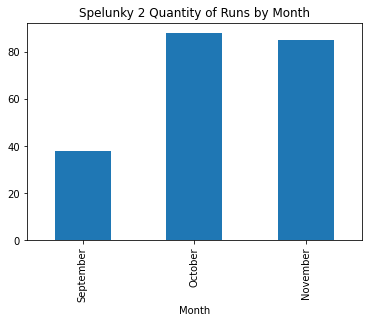

In [52]:
septemberCount = np.count_nonzero(df['Date'] < '2020-10-01')
octoberCount = np.count_nonzero(df['Date'] < '2020-11-01') - septemberCount
novemberCount = np.count_nonzero(df['Date'] < '2020-12-01') - octoberCount
print(septemberCount)
print(octoberCount)
print(novemberCount)

monthsArray = ([ ['September', septemberCount], ['October', octoberCount], ['November', novemberCount]])
monthsdf = pd.DataFrame(data = monthsArray, columns = ['Month', 'Number of Runs Submitted'])

monthsdf.plot(kind = 'bar', x = 'Month', y='Number of Runs Submitted', legend = False)
plt.title("Spelunky 2 Quantity of Runs by Month")